In [5]:
# Load and Explore data

import pandas as pd

# Load the dataset

df = pd.read_csv("Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Shape of the dataset (rows, columns)
df.shape

# Summary info about columns
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
# Check value counts of the target variable
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

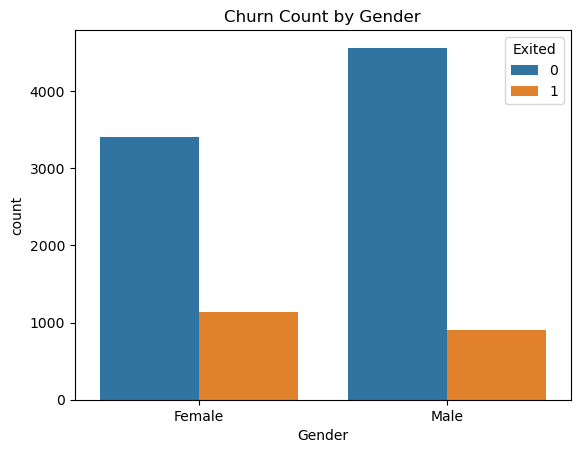

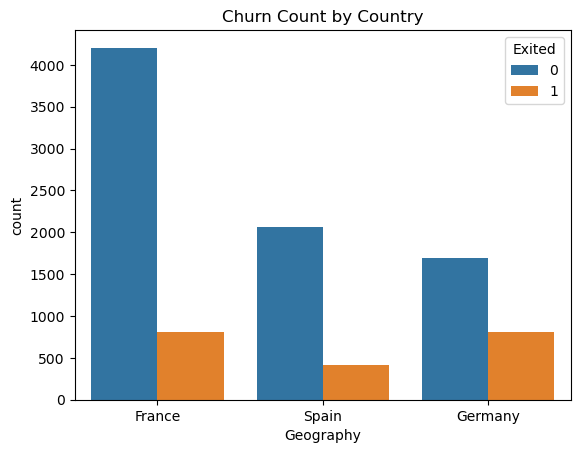

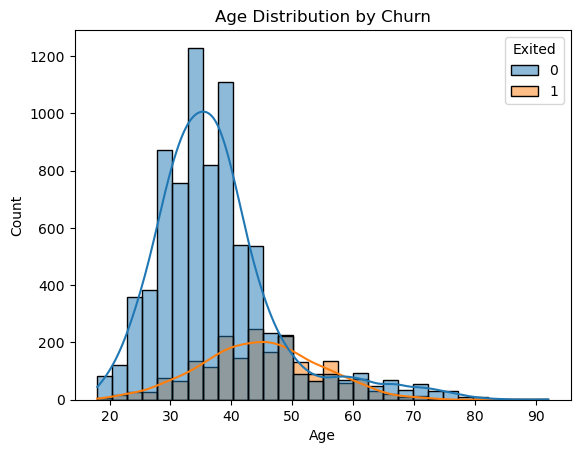

In [26]:
# EDA 
import seaborn as sns
import matplotlib.pyplot as plt

# Plot: Churn rate by gender
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Churn Count by Gender")
plt.show()

# Plot: Churn by Geography
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Churn Count by Country")
plt.show()

# Plot: Age distribution of churned vs non-churned
sns.histplot(data=df, x="Age", hue="Exited", kde=True, bins=30)
plt.title("Age Distribution by Churn")
plt.show()


In [28]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [30]:
# Encode Gender
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})

# One-hot encode Geography
df_clean = pd.get_dummies(df_clean, columns=['Geography'], drop_first=True)


In [32]:
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Train/Test split 
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

✅ Model Accuracy: 0.8110


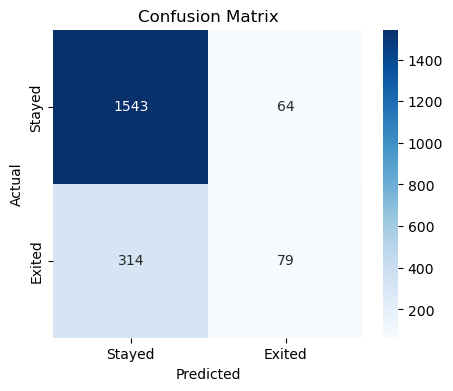


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [40]:
# Make prediction and Evaluate

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


In [42]:
# K-Fold Cross-Validation with Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create the model
logreg = LogisticRegression()

# Perform 5-fold CV
cv_scores = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')

# Display results
print("✅ Cross-Validation Scores:", cv_scores)
print(f"📊 Average Accuracy: {cv_scores.mean():.4f}")


✅ Cross-Validation Scores: [0.811  0.8085 0.8085 0.818  0.8025]
📊 Average Accuracy: 0.8097


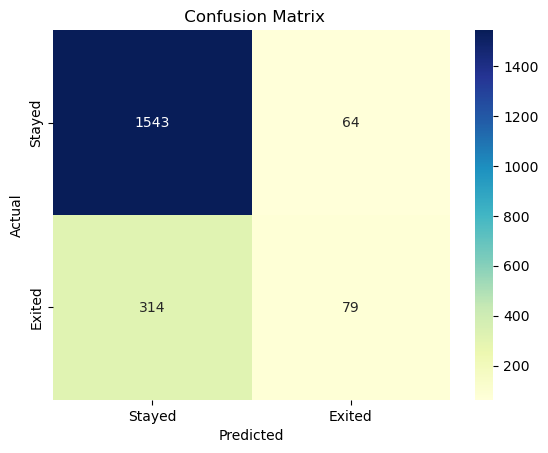

In [54]:
# Model Evaluation (Again but Deeper)

# Confusion Matrix (Again) + Heatmap:
from sklearn.metrics import confusion_matrix, classification_report

# Fit the model again on full training data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()


In [46]:
print("📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred))


📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [48]:
# Visualize Feature Importance (Logistic Regression)
import numpy as np

# Refit model to get coefficients
logreg.fit(X_train, y_train)

# Get feature names (after one-hot encoding)
feature_names = X.columns

# Get coefficients
coefs = logreg.coef_[0]

# Combine into DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Sort by absolute value of coefficients
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=True)


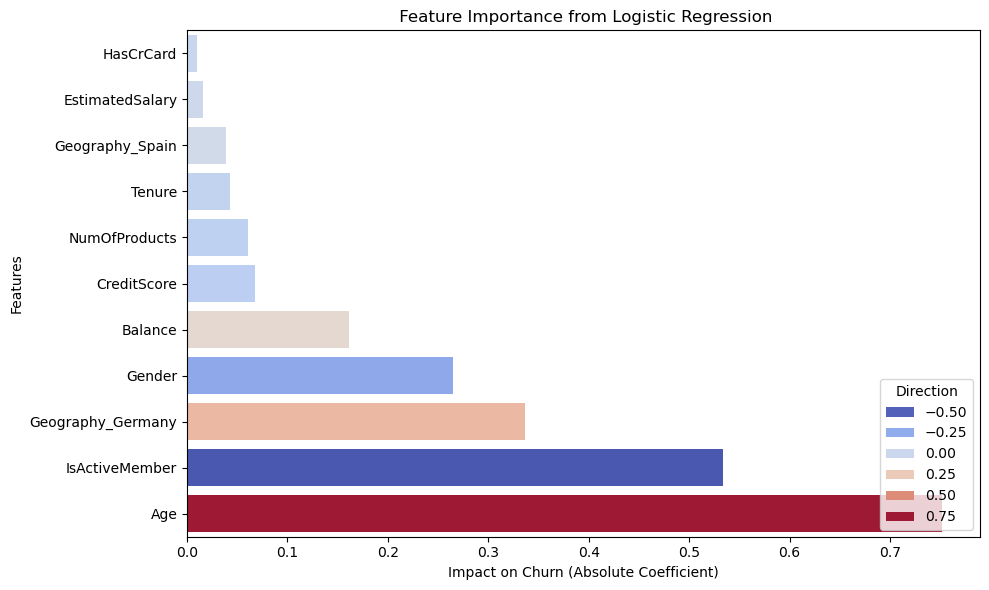

In [52]:
# Plot the Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, palette='coolwarm', hue='Coefficient', dodge=False)
plt.title(" Feature Importance from Logistic Regression")
plt.xlabel("Impact on Churn (Absolute Coefficient)")
plt.ylabel("Features")
plt.legend(title="Direction", loc='lower right')
plt.tight_layout()
plt.show()
